## Import the required libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("chest-xray-pneumonia"))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

['chest_xray']



 ## Data for this model is located in three folders</font>
   
1. The 'train' set holds the data used to train our model, typically comprising images or information that the model learns from. 
2. The 'val' set consists of images designated for validating the model. It serves the crucial purpose of guarding against **Overfitting**, a situation where the model becomes overly familiar with the training data, struggling when faced with unfamiliar data. 
3. 'test' encompasses the data employed to evaluate the model's learned associations between images and their respective labels, distinguishing between 'Pneumonia' and 'Not-Pneumonia'.

       
    
    

In [2]:
mainDIR = os.listdir('chest-xray-pneumonia/chest_xray')
print(mainDIR)

['chest_xray', 'test', 'train', 'val', '__MACOSX']


In [3]:
train_folder= 'chest-xray-pneumonia/chest_xray/train/'
val_folder = 'chest-xray-pneumonia/chest_xray/val/'
test_folder = 'chest-xray-pneumonia/chest_xray/test/'

In [4]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

## Access a few samples to see what the data looks like

1341
normal picture title:  NORMAL2-IM-1267-0001.jpeg
pneumonia picture title: person1576_bacteria_4127.jpeg


Text(0.5, 1.0, 'Pneumonia')

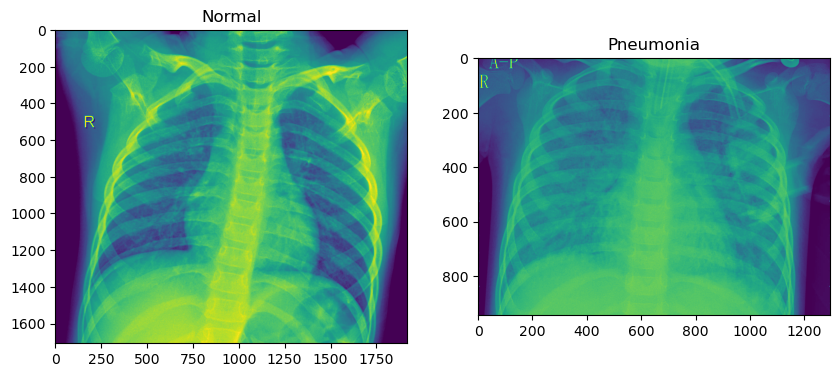

In [5]:
#Normal case 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia case
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

# Plot these images
f = plt.figure(figsize= (10,6))

a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

## Building the Convolutional Neural Network

In [6]:
cnn = Sequential()

# First Convolutional Layer
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(64, 64, 3)))  # Increased filters to 64

# First Pooling Layer
cnn.add(MaxPooling2D(pool_size=(2, 2))) 

# Second Convolutional Layer
cnn.add(Conv2D(64, (3, 3), activation="relu"))  # Increased filters to 64

# Second Pooling Layer
cnn.add(MaxPooling2D(pool_size=(2, 2))) 

# Third Convolutional Layer
cnn.add(Conv2D(128, (3, 3), activation="relu"))  # Additional conv layer with 128 filters

# Third Pooling Layer
cnn.add(MaxPooling2D(pool_size=(2, 2))) 

# Flattening Layer
cnn.add(Flatten())  

# First Fully Connected Layer
cnn.add(Dense(256, activation='relu'))  # Increased neurons to 256

# Second Fully Connected Layer
cnn.add(Dense(128, activation='relu'))  # Additional fully connected layer with 128 neurons

# Output Layer
cnn.add(Dense(1, activation='sigmoid'))  

# Compile the Neural Network
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 


In [7]:
num_of_test_samples = 624  # Updated the number of test samples

batch_size = 32

# Image Data Augmentation and Normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Image normalization

# Generating Training Set
train_set = train_datagen.flow_from_directory(
    'chest-xray-pneumonia/chest_xray/train',
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='binary'
)

# Generating Validation Set
val_set = test_datagen.flow_from_directory(
    'chest-xray-pneumonia/chest_xray/val',
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='binary'
)

# Generating Test Set
test_set = test_datagen.flow_from_directory(
    'chest-xray-pneumonia/chest_xray/test',
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [16]:
#import tensorflow as tf
#tf.keras.utils.plot_model(cnn, show_shapes=True)

## Training the CNN

In [17]:
cnn_model = cnn.fit_generator(train_set,
                         steps_per_epoch = 150,
                         epochs = 10,
                         validation_data = val_set,
                         validation_steps = len(val_set))

C:\Users\Aziz\AppData\Local\Temp\ipykernel_17404\3514542140.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model = cnn.fit_generator(train_set,


Epoch 1/10


150/150 [==============================] - 62s 400ms/step - loss: 0.4281 - accuracy: 0.8077 - val_loss: 0.6242 - val_accuracy: 0.6875
Epoch 2/10
150/150 [==============================] - 53s 354ms/step - loss: 0.2286 - accuracy: 0.9048 - val_loss: 0.3777 - val_accuracy: 0.8125
Epoch 3/10
150/150 [==============================] - 54s 357ms/step - loss: 0.1932 - accuracy: 0.9215 - val_loss: 0.4728 - val_accuracy: 0.6875
Epoch 4/10
150/150 [==============================] - 53s 351ms/step - loss: 0.1706 - accuracy: 0.9321 - val_loss: 0.9936 - val_accuracy: 0.5625
Epoch 5/10
150/150 [==============================] - 52s 349ms/step - loss: 0.1678 - accuracy: 0.9358 - val_loss: 1.3435 - val_accuracy: 0.5625
Epoch 6/10
150/150 [==============================] - 53s 357ms/step - loss: 0.1512 - accuracy: 0.9456 - val_loss: 0.4540 - val_accuracy: 0.6875
Epoch 7/10
150/150 [==============================] - 53s 350ms/step - loss: 0.1442 - accuracy: 0.9477 - val_loss: 0.6932 - val_

In [18]:
test_accu = cnn.evaluate_generator(test_set,steps=len(test_set))


C:\Users\Aziz\AppData\Local\Temp\ipykernel_17404\3502463741.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_accu = cnn.evaluate_generator(test_set,steps=len(test_set))


In [19]:
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 92.14743375778198 %


## Confusion matrix and Classification Report. 

In [20]:
Y_pred = cnn.predict_generator(test_set, steps=len(test_set), verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
cf_matrix = confusion_matrix(test_set.classes, y_pred)


C:\Users\Aziz\AppData\Local\Temp\ipykernel_17404\1073913053.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = cnn.predict_generator(test_set, steps=len(test_set), verbose=1)


20/20 [==============================] - 5s 255ms/step


In [21]:
max(y_pred)

0

<Axes: >

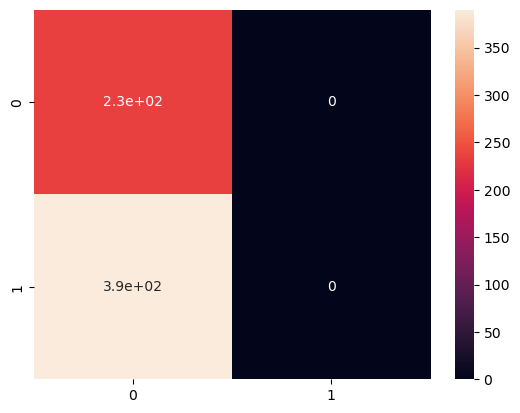

In [22]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

## Plot the results for better view and analysis

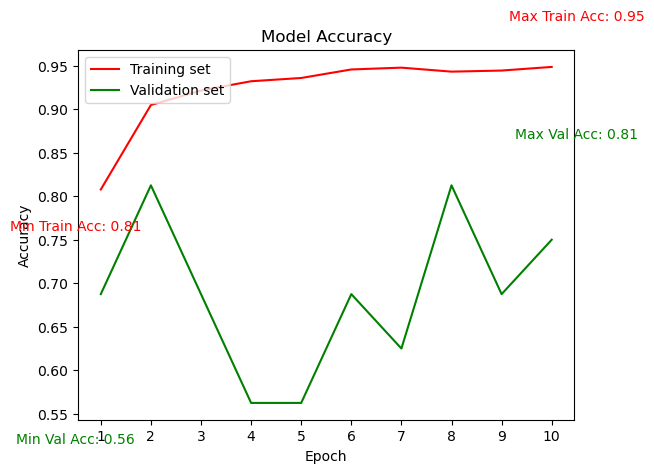

In [23]:
epochs = range(1, len(cnn_model.history['accuracy']) + 1)  # Generating values for all epochs

plt.plot(epochs, cnn_model.history['accuracy'], color='red')  # Training set accuracy in red
plt.plot(epochs, cnn_model.history['val_accuracy'], color='green')  # Validation set accuracy in green

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(epochs)  # Set x-axis ticks for each epoch
plt.legend(['Training set', 'Validation set'], loc='upper left')

min_train_acc = min(cnn_model.history['accuracy'])
max_train_acc = max(cnn_model.history['accuracy'])
min_val_acc = min(cnn_model.history['val_accuracy'])
max_val_acc = max(cnn_model.history['val_accuracy'])

# Annotating the lowest and highest values on the y-axis for training accuracy
plt.text(0.5, min_train_acc - 0.05, f"Min Train Acc: {min_train_acc:.2f}", ha='center', va='bottom', color='red')
plt.text(len(cnn_model.history['accuracy']) + 0.5, max_train_acc + 0.05, f"Max Train Acc: {max_train_acc:.2f}", ha='center', va='bottom', color='red')

# Annotating the lowest and highest values on the y-axis for validation accuracy
plt.text(0.5, min_val_acc - 0.05, f"Min Val Acc: {min_val_acc:.2f}", ha='center', va='bottom', color='green')
plt.text(len(cnn_model.history['val_accuracy']) + 0.5, max_val_acc + 0.05, f"Max Val Acc: {max_val_acc:.2f}", ha='center', va='bottom', color='green')

plt.show()


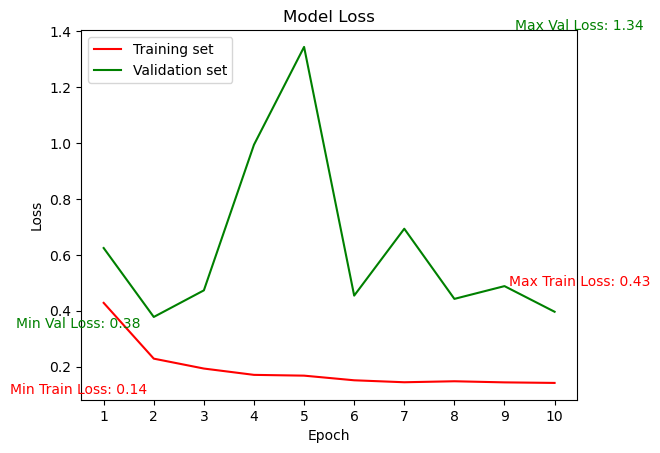

In [24]:
epochs = range(1, len(cnn_model.history['loss']) + 1)  # Generating values for all epochs

plt.plot(epochs, cnn_model.history['loss'], color='red')  # Training set loss in red
plt.plot(epochs, cnn_model.history['val_loss'], color='green')  # Validation set loss in green

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(epochs)  # Set x-axis ticks for each epoch
plt.legend(['Training set', 'Validation set'], loc='upper left')

min_train_loss = min(cnn_model.history['loss'])
max_train_loss = max(cnn_model.history['loss'])
min_val_loss = min(cnn_model.history['val_loss'])
max_val_loss = max(cnn_model.history['val_loss'])

# Annotating the lowest and highest values on the y-axis for training loss
plt.text(0.5, min_train_loss - 0.05, f"Min Train Loss: {min_train_loss:.2f}", ha='center', va='bottom', color='red')
plt.text(len(cnn_model.history['loss']) + 0.5, max_train_loss + 0.05, f"Max Train Loss: {max_train_loss:.2f}", ha='center', va='bottom', color='red')

# Annotating the lowest and highest values on the y-axis for validation loss
plt.text(0.5, min_val_loss - 0.05, f"Min Val Loss: {min_val_loss:.2f}", ha='center', va='bottom', color='green')
plt.text(len(cnn_model.history['val_loss']) + 0.5, max_val_loss + 0.05, f"Max Val Loss: {max_val_loss:.2f}", ha='center', va='bottom', color='green')

plt.show()
